In [15]:
import os, sys
import re
import json
import glob
import datetime

import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt
from nltk.corpus import stopwords
from collections import defaultdict

In [16]:
rpath = os.path.abspath('./..')
if rpath not in sys.path:
    sys.path.insert(0, rpath)

from src.loader import SlackDataLoader
import src.utils as utils

In [17]:
# Top 10 and Bottom 10 users based on reply count for week1

def get_user_reply_counts(path):
    """Get reply counts for each user."""
    user_reply_counts = defaultdict(int)

    # Get the user map
    for json_file in glob.glob(f"{path}*.json"):
        with open(json_file, 'r') as slack_data:
            try:
                data = json.load(slack_data)
            except json.JSONDecodeError:
                continue

            if not isinstance(data, list):
                continue

            for message in data:
                if not isinstance(message, dict):
                    continue

                user_id = message.get('user')

                if user_id is not None:
                    user_reply_counts[user_id] += message.get('reply_count', 0)

    return user_reply_counts

def main():
    slack_data_path = './../dataset/'  
    path = './../dataset/all-week1/'
    
    slack_loader = SlackDataLoader(slack_data_path)
    users = slack_loader.get_users()
    user_reply_counts = get_user_reply_counts(path)
    user_names_by_id, user_ids_by_name = slack_loader.get_user_map()

    sorted_users = sorted(user_reply_counts.items(), key=lambda x: x[1], reverse=True)

    top_10_users = sorted_users[:10]
    bottom_10_users = sorted_users[-10:]

    print("Top 10 Users by Reply Count:")
    for user_id, count in top_10_users:
        print(f"{user_names_by_id[user_id]} has {count} replies")

    print("\nBottom 10 Users by Reply Count:")
    for user_id, count in bottom_10_users:
        print(f"{user_names_by_id[user_id]} has {count} replies")

if __name__ == "__main__":
    main()


Top 10 Users by Reply Count:
Cristian has 80 replies
Michelle has 66 replies
Brenda has 51 replies
Veronica has 37 replies
Katie has 24 replies
Joshua has 21 replies
Travis has 18 replies
Steven has 12 replies
Mark has 12 replies
Anita has 11 replies

Bottom 10 Users by Reply Count:
Vanessa has 0 replies
Nicole has 0 replies
Anthony has 0 replies
Leah has 0 replies
Mandy has 0 replies
Joseph has 0 replies
Melissa has 0 replies
David has 0 replies
Brady has 0 replies
Robert has 0 replies


In [18]:
# Top 10 and Bottom 10 users based on mention count for week1

def get_user_mention_counts(path):
    """Get mention counts for each user."""
    user_mention_counts = defaultdict(int)

    for json_file in glob.glob(f"{path}*.json"):
        with open(json_file, 'r') as slack_data:
            try:
                data = json.load(slack_data)
            except json.JSONDecodeError:
                continue

            if not isinstance(data, list):
                continue

            for message in data:
                if not isinstance(message, dict):
                    continue

                # Extract mentions from blocks
                blocks = message.get('blocks', [])
                # print(blocks)
                for block in blocks:
                    elements = block.get('elements', [])
                    # print(elements)
                    for element in elements:
                        elements = element.get('elements', [])
                        for element in elements: 
                            if element.get('type') == 'user':
                                user_id = element.get('user_id')
                                if user_id:
                                    user_mention_counts[user_id] += 1


    return user_mention_counts

def main():
    slack_data_path = './../dataset/'  
    path = './../dataset/all-week1/'

    slack_loader = SlackDataLoader(slack_data_path)

    user_mention_counts = get_user_mention_counts(path)
    users = slack_loader.get_users()
    user_names_by_id, user_ids_by_name = slack_loader.get_user_map()

    sorted_users = sorted(user_mention_counts.items(), key=lambda x: x[1], reverse=True)

    top_10_users = sorted_users[:10]
    bottom_10_users = sorted_users[-10:]

    print("Top 10 Users by Mention Count:")
    for user_id, count in top_10_users:
        print(f"{user_names_by_id[user_id]} has {count} mentions")

    print("\nBottom 10 Users by Mention Count:")
    for user, count in bottom_10_users:
        print(f"{user_names_by_id[user_id]} has {count} mentions")

if __name__ == "__main__":
    main()



Top 10 Users by Mention Count:
Brittany has 17 mentions
Brenda has 10 mentions
Travis has 10 mentions
Garrett has 9 mentions
Michelle has 6 mentions
Mandy has 6 mentions
John has 4 mentions
Judith has 4 mentions
Amy has 4 mentions
Brian has 3 mentions

Bottom 10 Users by Mention Count:
Brian has 1 mentions
Brian has 1 mentions
Brian has 1 mentions
Brian has 1 mentions
Brian has 1 mentions
Brian has 1 mentions
Brian has 1 mentions
Brian has 1 mentions
Brian has 1 mentions
Brian has 1 mentions


In [19]:
# Top 10 and Bottom 10 users based on message count for week1

def get_user_message_counts(path):
    """Get message counts for each user."""
    user_message_counts = defaultdict(int)

    for json_file in glob.glob(f"{path}*.json"):
        with open(json_file, 'r') as slack_data:
            try:
                data = json.load(slack_data)
            except json.JSONDecodeError:
                continue

            if not isinstance(data, list):
                continue

            for message in data:
                if not isinstance(message, dict):
                    continue

                user_id = message.get('user')

                if user_id is not None:
                    user_message_counts[user_id] += 1
    return user_message_counts


def main():

    slack_data_path = './../dataset/' 
    path = './../dataset/all-week1/'
    slack_loader = SlackDataLoader(slack_data_path)
    user_message_counts = get_user_message_counts(path)
    users = slack_loader.get_users()
    user_names_by_id, user_ids_by_name = slack_loader.get_user_map()

    sorted_users = sorted(user_message_counts.items(), key=lambda x: x[1], reverse=True)

    top_10_users = sorted_users[:10]
    bottom_10_users = sorted_users[-10:]

    print("Top 10 Users by Message Count:")
    for user_id, count in top_10_users:
        print(f"{user_names_by_id[user_id]} has {count} messages")

    print("\nBottom 10 Users by Message Count:")
    for user_id, count in bottom_10_users:
        print(f"{user_names_by_id[user_id]} has {count} messages")

if __name__ == "__main__":
    main()

Top 10 Users by Message Count:
Cristian has 72 messages
Brenda has 56 messages
Travis has 47 messages
Michelle has 43 messages
Veronica has 38 messages
Joshua has 30 messages
Katie has 30 messages
Brittany has 25 messages
Phillip has 21 messages
April has 19 messages

Bottom 10 Users by Message Count:
Leah has 2 messages
Randy has 2 messages
Jodi has 2 messages
Allison has 1 messages
Nicole has 1 messages
Kelly has 1 messages
Melissa has 1 messages
David has 1 messages
Christopher has 1 messages
Robert has 1 messages


In [20]:
# Top 10 and Bottom 10 users based on reaction count for week1

def get_user_reaction_counts(path):
    """Get reaction counts for each user."""
    user_reaction_counts = defaultdict(int)

    for json_file in glob.glob(f"{path}*.json"):
        with open(json_file, 'r') as slack_data:
            try:
                data = json.load(slack_data)
            except json.JSONDecodeError:
                continue

            if not isinstance(data, list):
                continue

            for message in data:
                if not isinstance(message, dict):
                    continue

                user_id = message.get('user')
                reactions = message.get('reactions', [])

                if user_id is not None:
                    user_reaction_counts[user_id] += len(reactions)

    return user_reaction_counts

def main():

    slack_data_path = './../dataset/'  
    path = './../dataset/all-week1/'

    slack_loader = SlackDataLoader(slack_data_path)

    user_reaction_counts = get_user_reaction_counts(path)
    users = slack_loader.get_users()
    user_names_by_id, user_ids_by_name = slack_loader.get_user_map()

    sorted_users = sorted(user_reaction_counts.items(), key=lambda x: x[1], reverse=True)

    top_10_users = sorted_users[:10]
    bottom_10_users = sorted_users[-10:]

    print("Top 10 Users by Reaction Count:")
    for user, count in top_10_users:
        print(f"{user_names_by_id[user]} has got {count} reactions")

    print("\nBottom 10 Users by Reaction Count:")
    for user, count in bottom_10_users:
        print(f"{user_names_by_id[user]}has got {count} reactions")

if __name__ == "__main__":
    main()


Top 10 Users by Reaction Count:
Katie has got 10 reactions
Travis has got 6 reactions
Joshua has got 6 reactions
Cristian has got 6 reactions
Amy has got 6 reactions
Michelle has got 5 reactions
Brittany has got 4 reactions
Brenda has got 4 reactions
April has got 4 reactions
Carlos has got 4 reactions

Bottom 10 Users by Reaction Count:
Mandyhas got 0 reactions
Jenniferhas got 0 reactions
Kellyhas got 0 reactions
Melissahas got 0 reactions
Garyhas got 0 reactions
Davidhas got 0 reactions
Christopherhas got 0 reactions
Randyhas got 0 reactions
Bradyhas got 0 reactions
Jodihas got 0 reactions


In [21]:
# Top 10 messages based on replies for week1

def get_top_messages_by_replies(path, top_n=10):
    """Get top messages by replies."""
    message_replies = defaultdict(int)

    for json_file in glob.glob(f"{path}*.json"):
        with open(json_file, 'r') as slack_data:
            try:
                data = json.load(slack_data)
            except json.JSONDecodeError:
                continue

            if not isinstance(data, list):
                continue

            for message in data:
                if not isinstance(message, dict):
                    continue

                reply_count = message.get('reply_count', 0)
                message_text = message.get('text', '')
                message_replies[message_text] += reply_count

    sorted_messages = sorted(message_replies.items(), key=lambda x: x[1], reverse=True)
    top_messages = sorted_messages[:top_n]

    return top_messages

def main():

    slack_data_path = './../dataset/'  
    path = './../dataset/all-week1/'

    top_messages = get_top_messages_by_replies(path)
    print("Top 10 Messages by Replies:")
    for message, reply_count in top_messages:
        print(f"Message: {message}")
        print(f"Replies: {reply_count}\n")

if __name__ == "__main__":
    main()


Top 10 Messages by Replies:
Message: I need some one who understood task two to ask more questions??
Replies: 18

Message: <@U03UKL27B0R> I have used sum but it didn't sum the values. I want to add the duration with the same id in the first column. I didn't add.
Replies: 14

Message: What is everybody using to measure session frequency in the data?
Replies: 12

Message: What are you guys using for your work please, jupyter from anaconda is giving some troubles?
Replies: 12

Message: <https://tenx.10academy.org/trainee> , I bookmarked this link, but it is not working these couple of days
It is constantly giving me this default error page.
What seems to be the problem here?
<@U03UYNR4TS4>
Replies: 11

Message: Can someone please explain to me what is expected here:
Replies: 11

Message: I suggest that if  the managing team made a share experience session with one of 10 Academy alumni to share his experience on how he manage to deliver the tasks and time management also and what we should

In [22]:
# Top 10 messages based on mentions for week1

def get_message_mention_counts(path):
    """Get mention counts for each user in message text."""
    user_mention_counts = defaultdict(int)

    for json_file in glob.glob(f"{path}*.json"):
        with open(json_file, 'r') as slack_data:
            try:
                data = json.load(slack_data)
            except json.JSONDecodeError:
                continue

            if not isinstance(data, list):
                continue

            for message in data:
                if not isinstance(message, dict):
                    continue

                text = message.get('text', '')
                user_mentions = []
                blocks = message.get('blocks', [])
                
                for block in blocks:
                    elements = block.get('elements', [])
                    for element in elements:
                        elements = element.get('elements', [])
                        for element in elements: 
                            if element.get('type') == 'user':
                                user_id = element.get('user_id')
                                if user_id:
                                    user_mentions.append(user_id)

                for user_id in user_mentions:
                    user_mention_counts[user_id] += text.count(f"<@{user_id}>")

    return user_mention_counts

def main():
    slack_data_path = './../dataset/'  
    path = './../dataset/all-week1/'

    slack_loader = SlackDataLoader(slack_data_path)

    user_mention_counts = get_message_mention_counts(path)
    users = slack_loader.get_users()
    user_names_by_id, user_ids_by_name = slack_loader.get_user_map()

    sorted_users = sorted(user_mention_counts.items(), key=lambda x: x[1], reverse=True)

    top_10_users = sorted_users[:10]
    bottom_10_users = sorted_users[-10:]

    print("Top 10 Users by Message Mention Count:")
    for user_id , count in top_10_users:
        print(f"{user_names_by_id[user_id]}has got {count} mentions")

    print("\nBottom 10 Users by Message Mention Count:")
    for user, count in bottom_10_users:
        print(f"{user_names_by_id[user_id]} has got {count} mentions")

if __name__ == "__main__":
    main()


Top 10 Users by Message Mention Count:
Brittanyhas got 17 mentions
Brendahas got 10 mentions
Travishas got 10 mentions
Garretthas got 9 mentions
Michellehas got 6 mentions
Mandyhas got 6 mentions
Johnhas got 4 mentions
Judithhas got 4 mentions
Amyhas got 4 mentions
Brianhas got 3 mentions

Bottom 10 Users by Message Mention Count:
Brian has got 1 mentions
Brian has got 1 mentions
Brian has got 1 mentions
Brian has got 1 mentions
Brian has got 1 mentions
Brian has got 1 mentions
Brian has got 1 mentions
Brian has got 1 mentions
Brian has got 1 mentions
Brian has got 1 mentions


In [23]:
# Top 10 messages based on reactions for week1

def get_top_messages_by_reactions(path, top_n=10):
    """Get top messages by reactions."""
    message_reactions = defaultdict(int)

    for json_file in glob.glob(f"{path}*.json"):
        with open(json_file, 'r') as slack_data:
            try:
                data = json.load(slack_data)
            except json.JSONDecodeError:
                continue

            if not isinstance(data, list):
                continue

            for message in data:
                if not isinstance(message, dict):
                    continue

                reactions = message.get('reactions', [])
                total_reactions = sum(reaction.get('count', 0) for reaction in reactions)
                message_text = message.get('text', '')
                message_reactions[message_text] += total_reactions

    sorted_messages = sorted(message_reactions.items(), key=lambda x: x[1], reverse=True)
    top_messages = sorted_messages[:top_n]

    return top_messages

def main():

    path = './../dataset/all-week1/'  
    top_messages = get_top_messages_by_reactions(path)

    print("Top 10 Messages by Reactions:")
    for message, reaction_count in top_messages:
        print(f"Message: {message}")
        print(f"Reactions: {reaction_count}\n")

if __name__ == "__main__":
    main()


Top 10 Messages by Reactions:
Message: I suggest that if  the managing team made a share experience session with one of 10 Academy alumni to share his experience on how he manage to deliver the tasks and time management also and what we should do to make the most out of this 3 months
Reactions: 5

Message: I think the best thing to do here is to have your own schedule. Everyone has a different attitude and approach toward things. And therefore the Aluminis advice might not be applicable to some and might be even bottom line impossible for others. And therefore I would like to recommend to you based on my imperceptible wisdom to have your own schedule at the beginning of the week. Take a look at that week's challenge doc. see what we are supposed to deliver (on the deliverables section) and after you understand what we need to complete and by when you then plan out the week. Now I think the most important part about the schedule is following it, you might not complete everything on time

The channel with the highest activity is: all-week3


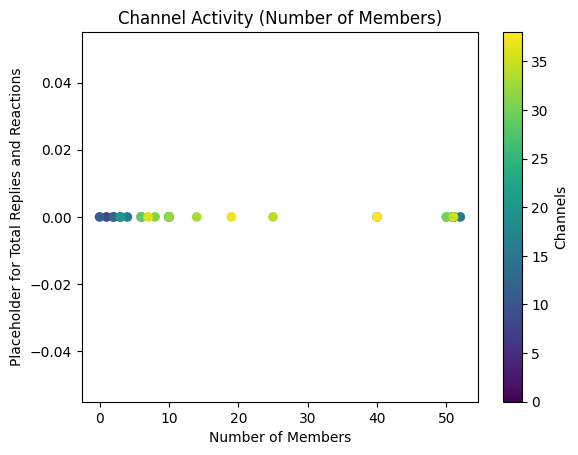

In [24]:
# Which channel has the highest activity? 
# Which channel appears at the right top corner when you plot a 2D scatter plot where x-axis is the number of messages in the channel, y-axis is the sum of number of replies and reactions, and the color representing channels?
#It uses members intsead of messages 

import matplotlib.pyplot as plt

def calculate_channel_activity(channels_data):
    channel_activity = {}
    for channel in channels_data:
        channel_name = channel['name']
        channel_id = channel['id']
        members_count = len(channel['members'])
        channel_activity[channel_name] = members_count

    return channel_activity

data_loader = SlackDataLoader(path='./../dataset/')
channels_data = data_loader.get_channels()

channel_activity_data = calculate_channel_activity(channels_data)
highest_activity_channel = max(channel_activity_data, key=channel_activity_data.get)

print(f"The channel with the highest activity is: {highest_activity_channel}")

x_values = list(channel_activity_data.values())  
y_values = [0] * len(x_values) 
channel_names = list(channel_activity_data.keys())

plt.scatter(x_values, y_values, c=range(len(channel_names)), cmap='viridis')
plt.xlabel('Number of Members')
plt.ylabel('Placeholder for Total Replies and Reactions')
plt.title('Channel Activity (Number of Members)')
plt.colorbar(label='Channels')
plt.show()


In [25]:
# Which channel has the highest activity? 
# Which channel appears at the right top corner when you plot a 2D scatter plot where x-axis is the number of messages in the channel, y-axis is the sum of number of replies and reactions, and the color representing channels?


x_axis_message_count = {}
y_axis_reply_reaction_count = {}

data_loader = SlackDataLoader(path='./../dataset/')
channels_data = data_loader.get_channels()

for channel in channels_data:
    path = channel['name']
    replay_df = data_loader.slack_parser(f"../dataset/{channel['name']}")
    reaction_df = data_loader.parse_slack_reaction(f"../dataset/{channel['name']}", channel['name'])

    total_reply_count = replay_df['reply_count'].sum()
    total_reaction_count = reaction_df['reaction_count'].sum()

    x_axis_message_count[channel['name']] = len(replay_df)
    y_axis_reply_reaction_count[channel['name']] = total_reply_count + total_reaction_count


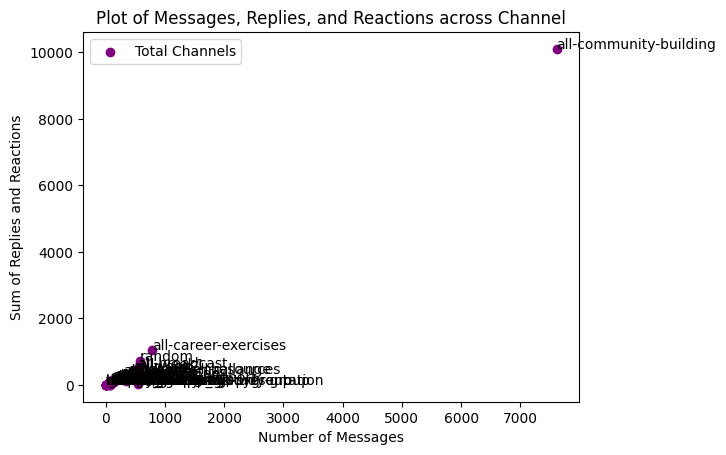

In [26]:
channels = list(x_axis_message_count.keys())
x_values = list(x_axis_message_count.values())
y_values = list(y_axis_reply_reaction_count.values())

# Start plotting using your labels
plt.scatter(x_values, y_values, c='purple', label='Total Channels')

# Add labels and title
plt.xlabel('Number of Messages')
plt.ylabel('Sum of Replies and Reactions')
plt.title('Plot of Messages, Replies, and Reactions across Channel')

# Add channel labels
for i, channel in enumerate(channels):
    plt.annotate(channel, (x_values[i], y_values[i]))

plt.legend()
plt.show()

/tmp/ipykernel_72946/1018247185.py:15: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  start_datetime = datetime.utcfromtimestamp(float(start_time))
/tmp/ipykernel_72946/1018247185.py:16: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  end_datetime = datetime.utcfromtimestamp(float(end_time))


Total number of messages:  2020
Number messages replied within 5 minutes:  679
The Fraction of messages replied within 5 minutes:  0.33613861386138616


/tmp/ipykernel_72946/1018247185.py:47: DeprecationWarning: datetime.datetime.utcfromtimestamp() is deprecated and scheduled for removal in a future version. Use timezone-aware objects to represent datetimes in UTC: datetime.datetime.fromtimestamp(timestamp, datetime.UTC).
  y_values = [datetime.utcfromtimestamp(float(msg_timestamp)).hour for msg_timestamp, _ in message_timestamps]


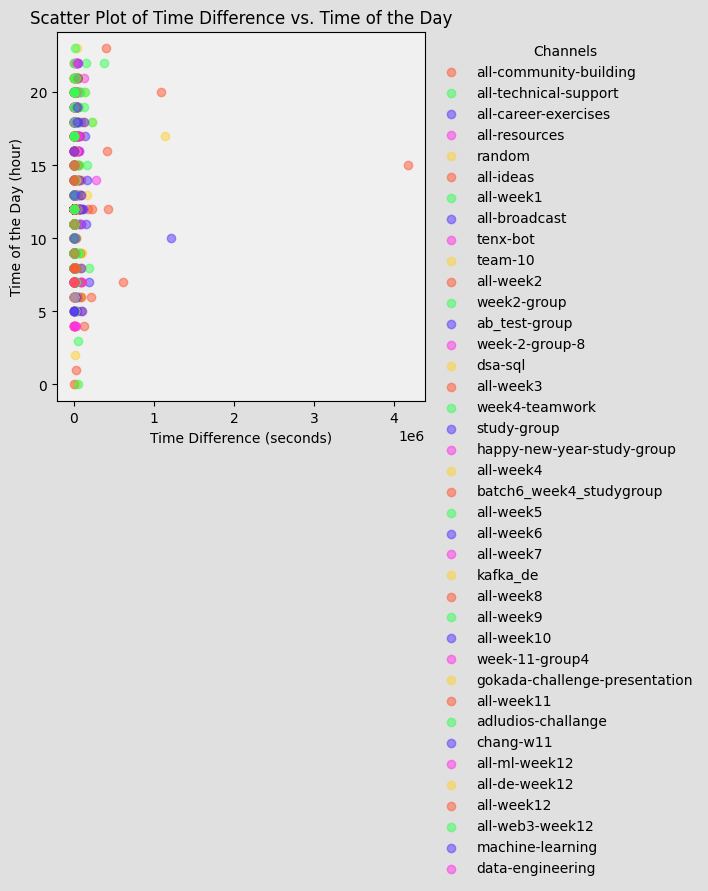

In [28]:
# What fraction of messages are replied within the first 5mins?
# Plot a 2D scatter plot such that x-axis is the time difference between the message timestamp and the first reply message, y-axis is the time of the day (in 24hr format), color representing channels? 

from datetime import datetime
from itertools import cycle

def calculate_time_difference_seconds(start_time, end_time):
    """
    Calculate the time difference in seconds between two timestamps.

    Args:
        start_time (float): Start timestamp.
        end_time (float): End timestamp.

    Returns:
        float: Time difference in seconds.
    """
    start_datetime = datetime.utcfromtimestamp(float(start_time))
    end_datetime = datetime.utcfromtimestamp(float(end_time))
    time_difference_seconds = (end_datetime - start_datetime).total_seconds()
    return time_difference_seconds

def process_channels_data(channels_data):
    channels_stamps = {}
    channels_no_reply_count = {}
    message_reply_less_than_5_minutes = 0
    total_messages = 0

    for channel in channels_data:
        path_channel = f"../dataset/{channel['name']}"
        stamps, no_reply_messages_count = get_messages_reply_timestamp_from_channel(path_channel)
        channels_stamps[channel["name"]] = stamps
        channels_no_reply_count[channel["name"]] = no_reply_messages_count

        for msg_timestamp, reply_timestamp in stamps:
            time_difference = calculate_time_difference_seconds(msg_timestamp, reply_timestamp)
            if time_difference <= 300:  # 300 seconds = 5 minutes
                message_reply_less_than_5_minutes += 1

        total_messages += (len(stamps) + no_reply_messages_count)

    print("Total number of messages: ", total_messages)
    print("Number messages replied within 5 minutes: ", message_reply_less_than_5_minutes)
    print("The Fraction of messages replied within 5 minutes: ", message_reply_less_than_5_minutes / total_messages)

    fig, ax = plt.subplots()
    colors = cycle(['#FF5733', '#33FF57', '#5733FF', '#FF33E6', '#FFD133'])  # More colorful palette
    for channel_name, message_timestamps in channels_stamps.items():
        x_values = [calculate_time_difference_seconds(msg_timestamp, reply_timestamp) for msg_timestamp, reply_timestamp in message_timestamps]
        y_values = [datetime.utcfromtimestamp(float(msg_timestamp)).hour for msg_timestamp, _ in message_timestamps]

        current_color = next(colors)
        ax.scatter(x_values, y_values, label=channel_name, alpha=0.5, color=current_color)

    ax.set_xlabel('Time Difference (seconds)')
    ax.set_ylabel('Time of the Day (hour)')
    ax.set_title('Scatter Plot of Time Difference vs. Time of the Day')

    # Set background color
    ax.set_facecolor('#F0F0F0')  # Light gray background
    fig.set_facecolor('#E0E0E0')  # Slightly darker background

    # Move the legend outside and add more spacing
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title='Channels', frameon=False)
    plt.subplots_adjust(right=0.7)  # Adjust the spacing between the plot and the legend

    plt.show()

def get_messages_reply_timestamp_from_channel(path_channel):
    stamps = []
    no_reply_messages_count = 0

    # specify path to get json files
    json_files = [f"{path_channel}/{pos_json}" for pos_json in os.listdir(path_channel) if pos_json.endswith('.json')]
    combined = []

    for json_file in json_files:
        with open(json_file, 'r', encoding="utf8") as slack_data:
            json_content = json.load(slack_data)
            combined.extend(json_content)

    for msg in combined:
        if 'subtype' not in msg:
            text = msg.get('text', None)
            ts = msg.get('ts', None)

            if 'replies' in msg:
                reply_ts_list = [reply.get('ts') for reply in msg['replies']]
                if reply_ts_list:
                    latest_reply_ts = max(reply_ts_list)
                    stamps.append((ts, latest_reply_ts))
                else:
                    no_reply_messages_count += 1

    return stamps, no_reply_messages_count

if __name__ == "__main__":
    data_loader = SlackDataLoader(path='./../dataset/')
    channels_data = data_loader.get_channels()
    process_channels_data(channels_data)